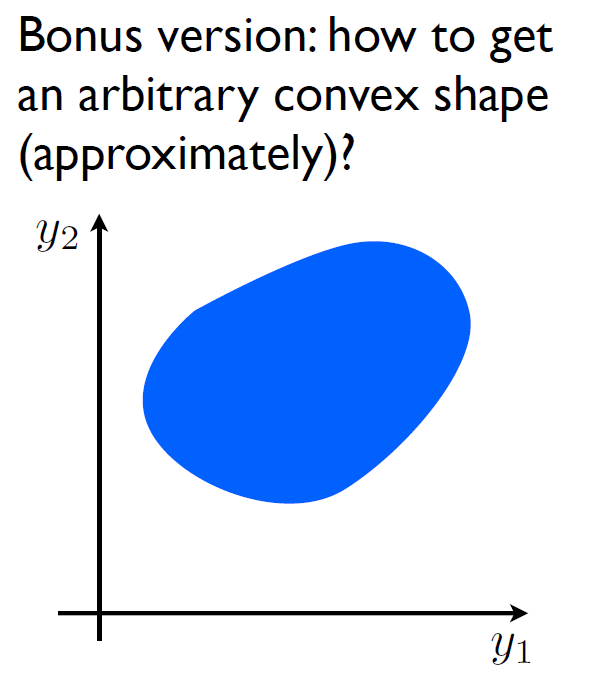

Let us approximate the arbitrary convex shape with a set of $N$ points connected through segments. The shape will become more and more precise as the number of points increases.

We can use an artificial neuron to approximate each of the segments. Finally, to take only the inner part, we require that only when all the neurons are `ON` we have a non-zero output with an $\text{AND}$ layer.

We remind that an artificial neuron is activated in the region of the plane
\begin{equation}
    w_1 x + w_2 y + b > 0.
\end{equation}

Therefore, for each segment, we want to choose the weights and the bias of a neuron so that the plane points in the correct direction.

Consider two points $P_1 = (x_1, y_1, 0)$ and $P_2 = (x_2, y_2, 0)$. We want to find the equation of the plane that has direction $P_2P_1 = (x_2-x_1,y_2-y_1,0)$ and $\hat{z}=(0,0,1)$. Since $P_2P_1 \times \hat{z}=(y_2-y_1, x_1-x_2,0)$, and it must go through $P_2$, the plane has equation

\begin{equation}
 (y_2-y_1) x +(x_1-x_2) y +(y_1 x_2 - x_1 y_2) = 0.
\end{equation}

Therefore,
\begin{equation}
    w_1 = y_2-y_1 \\
    w_2 = x_1-x_2 \\
    b = y_1 x_2 - x_1 y_2.
\end{equation}

Finally, we create an `AND` neuron to which we connect all the previous neurons. Its parameters are obtained by generalizing the $2\text{-AND}$:

\begin{equation}
    w \ll 1 \\
    b = -w(N-0.5)
\end{equation}


# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Define the shape to approximate

In [2]:
convex_shape = np.array([
    [1,2], [1.5,1.8], [2.8,2], [4.1,3], 
    [5,4], [5.1, 5], [4,5.9], [2.3,6.2], [0.5, 4], [0.7,3], [1,2]
])

# Define the network

In [3]:
N = len(convex_shape)-1

In [4]:
w = np.zeros([N,2])
w[:,0] = convex_shape[1:,1] -convex_shape[:-1,1]
w[:,1] = convex_shape[:-1,0] - convex_shape[1:,0]

b = np.zeros(N)
b = convex_shape[:-1,1]*convex_shape[1:,0] - convex_shape[:-1,0]*convex_shape[1:,1]

In [5]:
# Activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# First layer
roughness = 10
def apply_1(x,y):
    return sigmoid(-roughness*(w[:,0]*x +w[:,1]*y +b))

# Second layer
def apply_andall(z):
    return sigmoid(roughness*(np.sum(z,axis=-1) - (np.shape(z)[-1]-0.5)))

def apply_net(x,y):
    z1 =  apply_1(x,y)
    z2 = apply_andall(z1)
    return z2

# Evaluate the model and plot the results

In [6]:
x_start = 0
x_end = 10

y_start = 0
y_end = 10


Mx = 100
x_in = np.linspace(x_start,x_end,Mx)

My = 100
y_in = np.linspace(y_start,y_end,My)

x_test, y_test = np.meshgrid(x_in, y_in)

f_out = apply_net(x_test.reshape([-1,1]),y_test.reshape([-1,1]))
f_out = f_out.reshape([My,Mx])

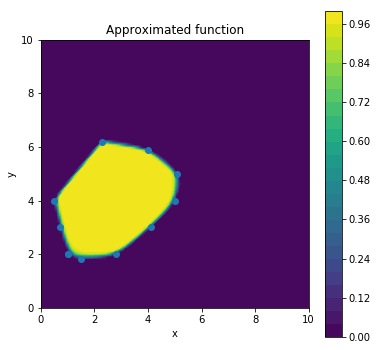

In [7]:
plt.figure(figsize=[6,6])
plt.contourf(x_test,y_test,f_out,30)
plt.colorbar()
plt.title("Approximated function")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.scatter(convex_shape[:,0],convex_shape[:,1])
plt.show()

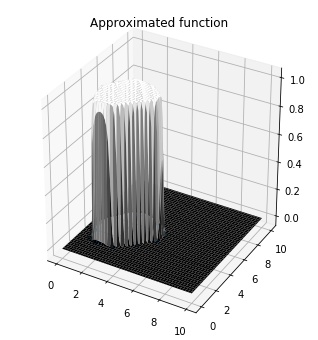

In [8]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(1,2,1,projection="3d")
plt.title("Approximated function")
ax.plot_surface(x_test,y_test,f_out, cmap=plt.cm.gray)
ax.scatter(convex_shape[:,0],convex_shape[:,1])
plt.show()